# Using Python for Geospatial Science

> **Page in Production**

The aim of this Jupyter Notebook, as with the rest of the document in this repository, is to give you a very brief whirlwind tour of how we might use Python to perform geospatial data analysis. It's not going to be an extremely detailed introduction that will allow to start doing advanced science with no other support - but it will point you in right direction for doing a wide variety of geospatial tasks, identifying the most common/established methods that you can use as a springboard for googling/LLMing a solution.

## Basic Python

This is very basic Python that you can find at any tutorial, so I will cover it extremely quickly. If you're running this Notebook, and not just viewing it online, you will be able to edit and run the code blocks ("cells") yourself by clicking the 'play' button, or by pressing `SHIFT+ENTER`.

In [1]:
# Click on this cell and press SHIFT + ENTER to run this code,
# which outputs the text 'hello world'.

print('hello world!')

hello world!


You can run code again and again. You can't hurt anything - if you break it, you can reboot the notebook by clicking `Kernel` in the tool bar, and `Restart Kernel` and `Clear Output of All Cells`.

### Basic operations

At the most basic level, we can use Python to do operations between the basic data types, which include numeric, string (text), and Boolean (`True`/`False`) data types.

In [2]:
# By the way, this text is called a "comment". It's a message to other
# humans. Starting a line with "#" tells the program not to read this
# line. The program will go to the next line that doesn't start with '#'

5 - 4

1

In [3]:
8 * 4

32

In [4]:
(7-3) * 5

20

In [5]:
5 == (1 + 4)   # Two equal signs ('==') evaluates whether the left
               # side is equal to the right side, and returns True/False
               # (a data type known as a 'boolean' or 'bool')

True


We can string together more complex ideas by 'storing' values as variables:

In [6]:
# the following lines define variables called "a" and "b"
a = 4
b = 3

# the next line shows us what a plus b is.
a+b

7

In [7]:
name = 'Tom'  # Now we're defining a 'string' rather than a number!

print('Hello, my name is ' + name)

Hello, my name is Tom



Variables are remembered between cells:

In [8]:
c = a*a  # this line calculates a times a and saves the result as a varialbe called "c"
c        # this line tells the program to show us what "c" is.

16


However, the cells need to be run in order for Python to work. In the first of the two cells below, we try and use a variable not_defined_yet before we define it. It will produce an error message. If you then run the second, where we define the variable, and then return to the first, it will work:

In [9]:
not_defined_yet ** 2  # Two asterisks raises the variable to a
                      # power - here, we're calculating the square.

NameError: name 'not_defined_yet' is not defined

In [10]:
not_defined_yet = 5

### Basic data structures and operations

We can combine our data types into data structures. Lists and Tuples are both chains of multiple items, with some slight differences in the background that give them slightly different purposes (you can explore this yourself). Dictionaries are used to store items in key:value pairs. 

In [14]:
my_list = [1, 2, 3, 4, 5]

for i in my_list:
    print(i)

my_dictionary = {
    'name': 'Tom',
    'language': 'Python',
    'framework': 'Jupyter'
}

print('Hello, my name is ' + my_dictionary['name'])

1
2
3
4
5
Hello, my name is Tom


Note that above I used a 'for loop' to iterate through my list - it will go through the list one at a time, applying the same commands to each of them. 

There are other ways we can interact with our data, such as `while` and `if`-`else` statements. `while` will continue looping through a set of commands until a condition is reached. `if` statements will only perform a certain task if a condition is met.

In [15]:
i = 0

while i < 5:

    if i == 3:
        print('The number three!')
    else:
        print(i)

    i = i + 1


0
1
2
The number three!
4


### Functions


We can begin to create more complex proceses using 'functions'. We've already seen one function in this notebook - the print function above. However, it's possible to define more functions:

In [16]:
# Define a function that will take a generic variable ('x') and return an output ('y')

def multiply_by_two(x):
    y = x * 2
    return y

Now, we can use this function elsewhere in the Notebook:

In [17]:
d = multiply_by_two(4)

d

8


The strength of Python's open-source capabilities is that we don't just need to rely on our own functions - instead, we'll be using those made by others. We can import packages made by others, giving us access to new functions. 

A default package included within the Python standard library is math, which provides the sort of functions you might expect:


In [18]:
import math

# Now we have `math`, we can call its functions in the form math.name_of_function(input)

e = math.sqrt(16)  # Calculate the square root

e

4.0

## Python for Data Analysis

### Using Python packages to create and plot data

Now that we understand the basics, we can begin to use the files we have installed. Although I only provided three packages to install (`rioxarray`, `geopandas`, and `matplotlib`), these included a number of key dependencies that we will be using. Perhaps the most foundational package for doing science in python is called `numpy`. `numpy` provides you a more feature-compete range of maths capability than `math` alone. Most importantly, it uses its own data type, called a `numpy` array, which is the foundational data type of nearly everything else we will be doing.

`numpy` can imported just like `math` - however, it is common to rename it to `np`, as we will be using it so much we want to save our keyboard!

In [45]:
import numpy as np

# Create a numpy array that ranges between 0 and 2pi, with 100 elements
x = np.linspace(0, 2*np.pi, 100)

# Show between the 10th and 20th element
print('Sample x:', x[10:20])

# Calculate the sine of each element
sinx = np.sin(x)

# Show between the 10th and 20th element
print('Sample sin(x):', sinx[10:20])

# Calculate the cosine of each element
cosx = np.cos(x)


Sample x: [0.63466518 0.6981317  0.76159822 0.82506474 0.88853126 0.95199777
 1.01546429 1.07893081 1.14239733 1.20586385]
Sample sin(x): [0.59290793 0.64278761 0.69007901 0.73459171 0.77614646 0.81457595
 0.84972543 0.88145336 0.909632   0.93414786]


Again, I am not going to go into detail here - hopefully you can interpret what is happening, and know where to go to find more examples!

We can also plot this data. The go-to for producing data for general uses is called `matplotlib`, the 'matlab plotting library' (because it originally aimed to emulate MATLAB plotting). Here is a quick example of the sort of thing you can do:

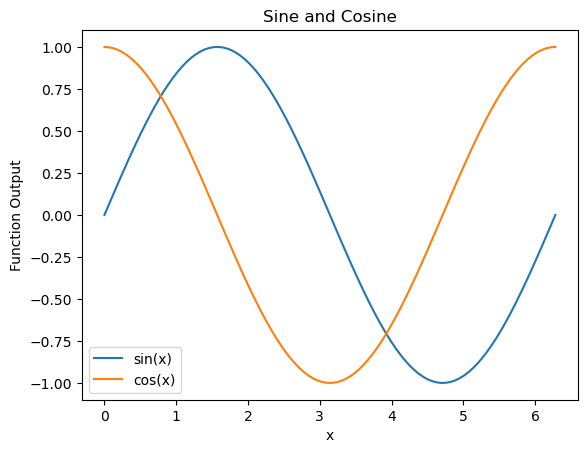

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(x, sinx, color='tab:blue', label='sin(x)')
ax.plot(x, cosx, color='tab:orange', label='cos(x)')

ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('Function Output')

ax.set_title('Sine and Cosine')

plt.show()

Note that numpy can produce n-dimensional data (1-D, 2-D, 3-D, $n$-d...). We can also plot it. Hopefully we can start to see how this might be useful for geospatial data...

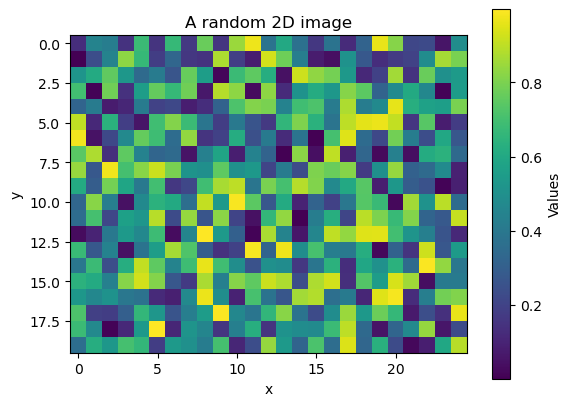

In [55]:
z=np.random.rand(500).reshape((20,25))

fig, ax = plt.subplots()

im = ax.imshow(z)
plt.colorbar(im, ax=ax, label='Values')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title('A random 2D image')

plt.show()

### Python packages to load tabular files

Okay, so we can generate random data and do some things to it. So what?

To begin to load and manipulate actual data, we need another package - something that kind of works like Microsoft Excel, maybe? Our solution here is `pandas`.

In [58]:
import pandas as pd

df = pd.read_csv('https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv', comment = "#")

Here, we have read the [Mauna Loa monthly mean CO2 record .csv file](https://gml.noaa.gov/ccgg/trends/data.html) using the handy `read_csv` function of pandas. Due to the awkard fact that this csv file has a load of comment lines (beginning with `#`) had to specify that to pandas, but this isn't a normal thing to do - normally just feeding the filepath of a csv (be it local or online) is enough to make things work!

We have called our variable `df`, standing for 'dataframe', which is what pandas calls its data type. We can see what it looks like by just called `df`:

In [59]:
df

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
805,2025,4,2025.2917,429.64,427.13,23,0.73,0.29
806,2025,5,2025.3750,430.51,427.26,23,0.39,0.16
807,2025,6,2025.4583,429.61,427.16,26,0.71,0.27
808,2025,7,2025.5417,427.87,427.45,24,0.31,0.12


Looks neat. Now we can also plot this data! We can call individual columns in a way similar to dictionaries - e.g. `df['average']` to get the 'average' column.

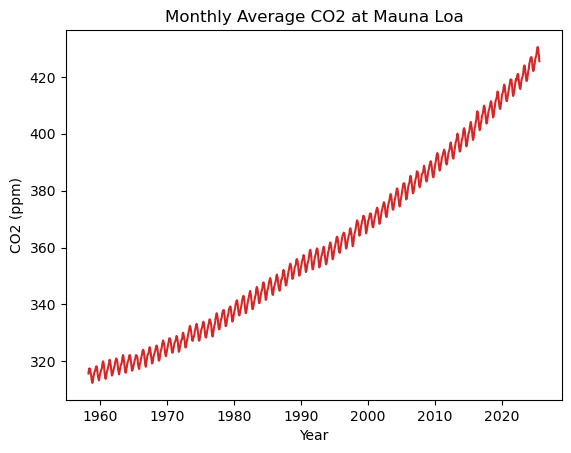

In [89]:
fig, ax = plt.subplots()

ax.plot(df['decimal date'], df['average'], color='tab:red', label='Average CO2')

ax.set_xlabel('Year')
ax.set_ylabel('CO2 (ppm)')

ax.set_title('Monthly Average CO2 at Mauna Loa')

plt.show()

We can also do additional things with our data for processing. We could do this using maths functions (including numpy etc) to create new columns:

In [67]:
# convert average ppm to average ppb
df['average_ppb'] = df['average'] / 1000

Or we can take advantage of pandas functinality to do more advanced stuff based around the context of the columns (e.g. annual averages, smoothing). Pandas is quite good at time-series stuff in particular - it was originally designed for economic trend analysis.

In [73]:
# generate a 'datetime' column from the year and month columns
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(Day=1))

# Calculate a rolling 12-month mean, centred on the current month
df['average_smoothed'] = df['average'].rolling(window=12, center=True).mean()

Note one thing we do here is turn our `year` and `month` columns, which are currently just `int` (integer) data, into a `datetime` datatype using the `pd.to_datetime()` function. `datetime` objects can be a little finnicky in Python, but Pandas makes it somewhat easy to manage this kind of data.

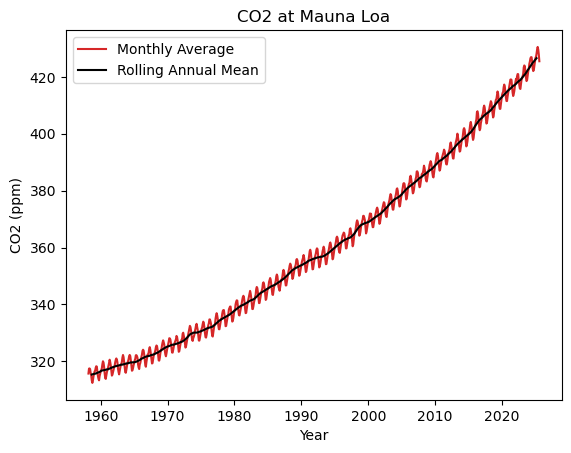

In [76]:
# plot
fig, ax = plt.subplots()

ax.plot(df['datetime'], df['average'], color='tab:red', label='Monthly Average')
ax.plot(df['datetime'], df['average_smoothed'], color='k', label='Rolling Annual Mean')

ax.legend()

ax.set_xlabel('Year')
ax.set_ylabel('CO2 (ppm)')

ax.set_title('CO2 at Mauna Loa')

plt.show()

### Working with Files

Once you have generated your data, we can re-export it to a file, so that we can use it in other scripts.

Nearly all tools today will have their own simple way of exporting data. For pandas dataframes, it is as follows:

In [ ]:
df.to_csv("../sample_data/mauna_loa_co2.csv")

However, it's worth highlighting a few further tools, specifically, `os`, for interacting with basic command line interfact, and `glob` for searching for files.

In the below cell, I do a few things using only `os` and tools you have seen so far. I first check to see if a directory called `sample_input` exists in the directory `sample_data`. If it doesn't exist (`if not os.path.exists(dir_path)`), I create it (`os.mkdir(dir_path`)). I then loop through a range of years 2020-2025, generating a pandas dataframe that contains two columns: the first all the dates in the year, and the second a series of random values (using `numpy`). 

This is necessary just to generate what I want to show you next, but it's worth showing just how simple it is! If you go to the `./sample_data/sample_input` directory in this repository, you can see that they have been created.

In [ ]:
import os

# Define directory path
dir_path = "../sample_data/sample_input"

# Create directory if it doesn't exist
if not os.path.exists(dir_path):

    # Make directory
    os.mkdir(dir_path)

    # Generate random data for CSV files 2020-2025
    for year in range(2020, 2026):
        dates = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31", freq="D")[:365]
        values = np.random.rand(len(dates)) * 100  # random values
        df = pd.DataFrame({"date": dates, "values": values})
        file_path = os.path.join(dir_path, f"data_{year}.csv")
        df.to_csv(file_path, index=False)


Anyway, the important thing is to imagine not that we have just created this data, but that we have a directory full of tens or hundreds of iteratively named data files (kind of like what we have with our `data_2020.csv` through `data_2025.csv` files). How can we begin to interact with these programatically?

One key was is using the `glob` standard library. `glob` allows us to search our file system for standardise file names using pattern matching. Below, we construct a `glob` search for files in the format `"./sample_data/sample_input/data_*.csv"`, where `*` just means "fill in the blanks". It returns a list of files that match, which we print. See that we get a list of all the matching files in the folder!

In [ ]:
import glob

# Find all csv files
csv_files = glob.glob("../sample_data/sample_input/data_*.csv"))

for f in csv_files:
    print(f)

./sample_data/sample_input/data_2021.csv
./sample_data/sample_input/data_2020.csv
./sample_data/sample_input/data_2022.csv
./sample_data/sample_input/data_2023.csv
./sample_data/sample_input/data_2024.csv
./sample_data/sample_input/data_2025.csv


Now, we have the ability to use our existing tools - such as looping and functions - to open these data sequentially and do interesting things with them. For now, we will just plot these on the same plot. However, imagine you had 1000 files that needed some slightly more complex processing applied. You could (with the help of internet searching and LLMs) loop through all 1000 files, apply the processing to each one, and export them under new standard naems to a new location. Hopefully this begins to show just how powerful programming can be...

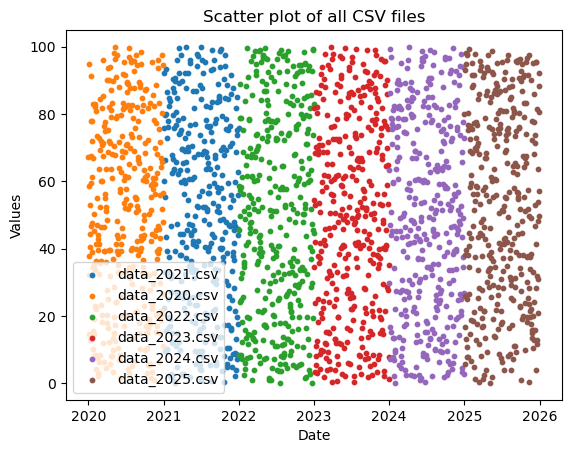

In [86]:

fig, ax = plt.subplots()

for file in csv_files:
    df = pd.read_csv(file, parse_dates=["date"])
    ax.scatter(df["date"], df["values"], s=10, label=os.path.basename(file))

ax.set_title("Scatter plot of all CSV files")
ax.set_xlabel("Date")
ax.set_ylabel("Values")
ax.legend()

plt.show()

## Python for Geospatial Analysis

### Python packages to load vector geospatial data

### Python packages to load n-dimensional climate data (e.g. netCDFs)

### Python packages to load raster data

## Advanced Python

### Creating modules and packages

### Downloading data: dynamic STACs and the Microsoft Planetary Computer

### Improving performance: `multi`, `numba` and `dask`